# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - Studentname

### Instructions
Test hypotheses for the price of automobiles:

1. Compare and test the normality of the distributions of **price** and **log price**. <br/>
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.

2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable. <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


#### Note: 
Please clearly outline the results of these tests with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
import scipy.stats as ss

In [2]:
# Read in the data

# Cleaned up Dataset location
filename = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

# Put into dataframe
autodf = pd.read_csv(filename)

In [3]:
# Check data
print(autodf.head())
autodf.dtypes

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel-system  bore  stroke compressi

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## 1. Compare and test normality of the distributions of price and log price
### Use both a graphical method and a formal test.

In [4]:
# Check data

# Checking price data
autodf.loc[:,'price'].head()

# Check for missing data
autodf.price.unique()

# Replace missing data with median
def fill_median(arg1):
    
    #identify numeric values
    numval = (arg1 != " ") & (arg1 != "?") & (arg1 != "??") & (arg1 != "NA")
    
    #identify non-numeric values
    nonnumval = ~numval
    
    #replace non-numeric values
    arg1[nonnumval] = np.median(arg1[numval].astype('float'))
    arg1 = arg1.astype('float')
    
    return(arg1)

# Replace column with new median-replaced column
autodf.loc[:,'price'] = fill_median(autodf.loc[:,'price'])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
# Check to see that column is now numeric / not containing '?'
print(autodf.dtypes)
print(autodf.loc[:,'price'].head())
print(autodf.price.unique())

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64
[13495. 16500. 13950. 17450. 15250. 17710. 18920. 23875. 10295. 16430.
 16925. 20970. 21105. 24565. 30760. 41315. 36880.  5151.  6295.  657

In [6]:
# Create a log-price column
autodf.loc[:,'log-price'] = np.log(autodf.loc[:,'price'])

#Check if column has been added
autodf.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
log-price            float64
dtype: object

Text(0,0.5,'Frequency')

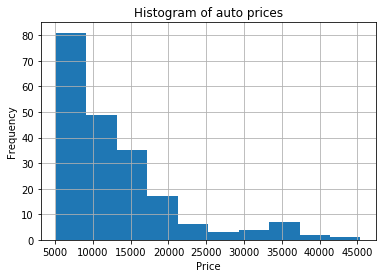

In [7]:
# Plot price
# plt.hist(autodf.loc[:,'price'], bins=30, color='white', edgecolor='black')
autodf.loc[:,'price'].hist()
plt.title('Histogram of auto prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

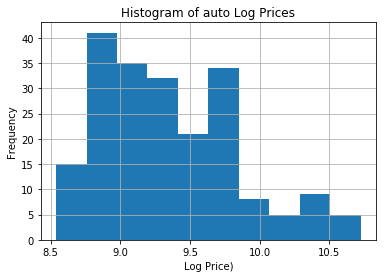

In [8]:
# Plot log price
autodf.loc[:,'log-price'].hist()
plt.title('Histogram of auto Log Prices')
plt.xlabel('Log Price)')
plt.ylabel('Frequency')

In [9]:
# Statistical normal test
stats.normaltest(autodf.loc[:,'price'])

NormaltestResult(statistic=81.8229178484423, pvalue=1.707572463071694e-18)

In [10]:
# Statistical tests
stats.normaltest(autodf.loc[:,'log-price'])

NormaltestResult(statistic=14.696370952207118, pvalue=0.0006437594180559249)

### Interpretations
By looking at the histograms of price and log price, we can see that the log price values have a more normal distribution. Once we calculated if the sample is a from a normal distribution with a formal test, we can see that neither are likely from a normal sample. However, the *log-price* is more likely to be from a normal distribution (*p* = .0006)  than the prices before transformation (*p* = 1.7 e-18).  If alpha was above .05 (let's say) then we could interpet these data as being from a normal sample.

## 2. Test significance of price stratified by a) fuel type, b) aspriation, and c) rear vs. front wheel drive.

In [11]:
# Check data you will be working with
print(autodf.dtypes)
autodf.loc[:,'fuel-type'].unique()

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
log-price            float64
dtype: object


array(['gas', 'diesel'], dtype=object)

### Comparing price by fuel type

In [12]:
# Create t-test for fuel-type
# Organize variables
gas = autodf.loc[autodf.loc[:,'fuel-type'] == 'gas', 'log-price']
diesel = autodf.loc[autodf.loc[:,'fuel-type'] == 'diesel', 'log-price']

In [23]:
# Create functions needed for t-test

# Create function to define confidence intervals
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Price')

# Create function for plotting t-tests
def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histogram of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Price')
    
def plot_pop(a, b, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histogram of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index) 

DegFreedom    23.423234
Difference    -0.232111
Statistic     -2.017983
PValue         0.055188
Low95CI       -0.469812
High95CI       0.005591
dtype: float64


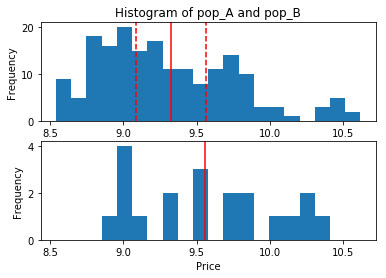

In [14]:
# Feed in fuel-type information
test_ft = t_test(gas, diesel, alpha = .05)
print(test_ft)
plot_t(gas, diesel, test_ft)


### Interpretations (price by fuel type)
As seen from the two above histograms (top = gas, bottom = diesel), the spread of gas powered cars compared to diesel cars is very different. By simply looking without any number crunching, we can see there are many more gas powered vehicles than diesel powered vehicles, which should be taken into consideration when interpreting results. The solid red line shows the mean of each respective fuel type. As seen above, the mean price for gas vehicles is lower than that of diesel vehicles. However, the high confidence interval value for the gas cars is almost exactly in the same place as our diesel pwered vehicle mean. To get an exact measure, we look to our statistical test. When comparing the values of gas and diesel cars, we get *p* = 0.055. Give our a priori decision of p must = less than .05 to reject the mean. We can just barely reject the mean here, meaning that the prices of gas versus diesel cars is *significantly* different, but only just barely. Gathering more data points for diesel cars would likely move the mean in either direction, yeilding more clear restuls for the t-test.

### Comparing price by aspiration

In [15]:
# Create t-test for aspiration

# Check data
print(autodf.dtypes)
print(autodf.loc[:,'aspiration'].unique())

# Organize variables
std = autodf.loc[autodf.loc[:,'aspiration'] == 'std', 'log-price']
turbo = autodf.loc[autodf.loc[:,'aspiration'] == 'turbo', 'log-price']

std.head()

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
log-price            float64
dtype: object
['std' 'turbo']


0    9.510075
1    9.711116
2    9.711116
3    9.543235
4    9.767095
Name: log-price, dtype: float64

DegFreedom    66.240183
Difference    -0.326451
Statistic     -4.416153
PValue         0.000038
Low95CI       -0.474032
High95CI      -0.178871
dtype: float64


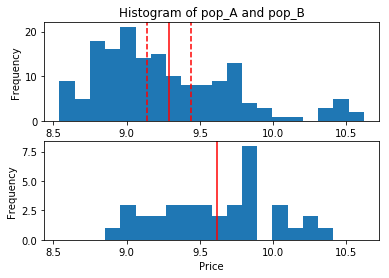

In [16]:
# Feed in aspiration information
test_asp = t_test(std, turbo, alpha = .05)

print(test_asp)
plot_t(std, turbo, test_asp)

### Interpretations (price by aspiration)
There are clearly more standard aspirations than turbo aspirations, this is generally good to keep in mind when making observations as the mean for the lesser group (in this case turbo) would likely change. The means (solid red lines) appear to be different from one another, but by simply looking at the solid line we cannot determine this. However, by looking at the high confidence interval value for standard aspirations (top) we can see that mean for turbo aspirations (bottom) is above that, meaning that the two price values for each type of car are significantly different. By looking at the stats we have created, we can see that *p* < .005 (.000), meaning that we can confidently reject the null hypothesis.

### Comparing price by drive type

In [17]:
# Create t-test for drive type

# Check data
print(autodf.dtypes)
print(autodf.loc[:,'drive-wheels'].unique())

# Organize variables
rwd = autodf.loc[autodf.loc[:,'drive-wheels'] == 'rwd', 'log-price']
fwd = autodf.loc[autodf.loc[:,'drive-wheels'] == 'fwd', 'log-price']

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
log-price            float64
dtype: object
['rwd' 'fwd' '4wd']


DegFreedom    1.240960e+02
Difference    7.075543e-01
Statistic     1.217148e+01
PValue        6.500851e-23
Low95CI       5.924954e-01
High95CI      8.226133e-01
dtype: float64


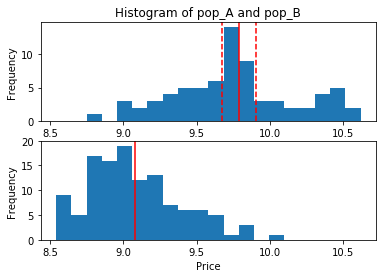

In [18]:
# Feed in drive-wheels information
test_dw = t_test(rwd, fwd, alpha = .05)

print(test_dw)
plot_t(rwd, fwd, test_dw)

### Interpretations (price by drive type)
This is the most significant difference we have seen between prices yet, with fwe (bottom) clearly having a majority of the values lower than that of rwd (top) cars. This interpretation is solidified by examining the statistics and seeing that*p* <.000. This means we can have a high confidence in rejecting the null hypothesis, or, in other words, have a high confidence in saying rwd and fwd have significantly different price points.

## 3. Apply ANOVA and Tukey's HSD test to the autoprice data to compare the price (or log price) of autos stratified by body style.

In [19]:
# Check data
autodf.dtypes
autodf.loc[:,'body-style'].head()
autodf.loc[:,'body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

## 4. Graphically explore the differences between price conditioned by the categories of each variable

6 70 96 25 8


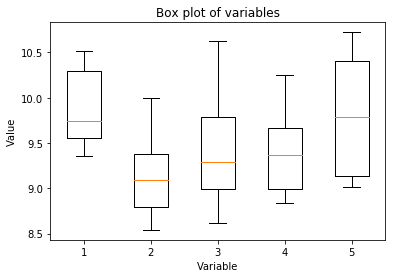

In [20]:
# Create dfs of different body syles
convertible = autodf.loc[autodf.loc[:, 'body-style'] == 'convertible', 'log-price']
hatchback = autodf.loc[autodf.loc[:,'body-style'] == 'hatchback', 'log-price']
sedan = autodf.loc[autodf.loc[:,'body-style'] == 'sedan', 'log-price']
wagon = autodf.loc[autodf.loc[:,'body-style'] == 'wagon', 'log-price']
hardtop = autodf.loc[autodf.loc[:,'body-style'] == 'hardtop', 'log-price']

plt.boxplot([convertible, hatchback, sedan, wagon, hardtop])
plt.ylabel('Value')
plt.xlabel('Variable')
plt.title('Box plot of variables')

# Check how many autos in each group
print(len(convertible), len(hatchback), len(sedan), len(wagon), len(hardtop))

##### **Looks like there is only 6 Convertible and 8 Hardtops, this is not sufficient data to have reliable results. Thus, we remove these autos from further testing.*

## 5. Use standard ANOVA and Tukey HSD to test the differences of these groups

In [21]:
# Model the ANOVA of the values by groups/print results
f_statistic, p_value = ss.f_oneway(hatchback, sedan, wagon)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 9.253897134092183
P-value = 0.00014682895957931244


### Calculate Tukey HSD

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# Create df without convertible or hardtop
autodf2 = autodf[autodf.loc[:, 'body-style'].isin(['hatchback', 'sedan', 'wagon'])]

# Calculate Tukey HSD
mc = MultiComparison(autodf2.loc[:,'log-price'], autodf2.loc[:,'body-style'])
mc_results = mc.tukeyhsd()
print(mc_results)


Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1  group2 meandiff  lower  upper  reject
-----------------------------------------------
hatchback sedan   0.3035   0.1359 0.4712  True 
hatchback wagon   0.2197  -0.0288 0.4682 False 
  sedan   wagon  -0.0838  -0.3233 0.1557 False 
-----------------------------------------------


### Interpretations
Convertibles and hard tops were removed prior to ANOVA and Tukey HSD due to insufficient data. When left with hatchbacks, sedans, and wagons, we are able to calculate reliable ANOVAs and Tukey HSD. With a p-value of < .05, we can reject the null hypothesis that all the groups came from the same sample. However, the ANOVA does not tell us which group is significantly larger or smaller than the other. The Tukey HSD table generate above shows that we can reject the null hypothesis for one comparison: Hatchback v. Sedan. This means that prices for a Hatchback is significantly different than that of a Sedan.